In [1]:
import py
from collections import defaultdict
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
from utils import calc_scores, get_dataset

In [3]:
dataset_name = 'moral-dataset-MeToo'

In [4]:
X_train, X_test, y_train, y_test = get_dataset(dataset_name)

In [5]:
X_train.shape, X_test.shape

((2623, 1), (650, 1))

In [6]:
with open('results/bootstrap_results_{}.pkl'.format(dataset_name), 'rb') as f:
    results = pickle.load(f)

In [7]:
results.keys()

dict_keys(['mlp-cross-label-dependency', 'mlp-powerset', 'mlp-base'])

In [8]:
score = 'jaccard'

In [9]:
scores = {}
for m, r in results.items():
    scores[m] = [calc_scores(y_true, y_pred).loc['OVERALL', score] for (y_pred, y_true) in r]

In [10]:
scores = pd.DataFrame(scores)

In [11]:
cols = ['mlp-base', 'mlp-cross-label-dependency', 'mlp-powerset']
renamer = {'mlp-base': 'MTL', 'mlp-cross-label-dependency': 'MTL-XLD', 'mlp-powerset': 'MLT-LP'}

In [12]:
scores.loc[:, cols].rename(columns=renamer, index=renamer).describe()

,MTL,MTL-XLD,MLT-LP
count,30.000000,30.000000,30.000000
mean,0.409189,0.487452,0.495623
std,0.015470,0.010175,0.009378
min,0.371903,0.463569,0.473374
25%,0.401420,0.481306,0.488796
50%,0.409411,0.490067,0.493258
75%,0.418044,0.495106,0.504107
max,0.437389,0.502498,0.514391


In [13]:
cols = ['mlp-base', 'mlp-cross-label-dependency', 'mlp-powerset']
renamer = {'mlp-base': 'MTL', 'mlp-cross-label-dependency': 'MTL-XLD', 'mlp-powerset': 'MTL-LP'}

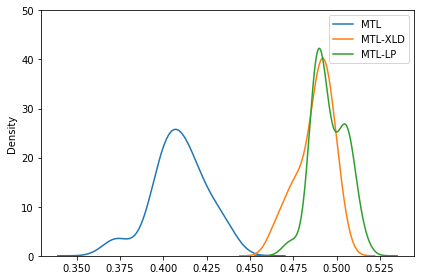

In [14]:
_ = scores.loc[:, cols].rename(columns=renamer, index=renamer).plot.kde(figsize=(6, 4), ylim=(0, 50))
plt.tight_layout()
plt.savefig('bbc-bootstrap.jpg', bbox_inches = "tight")

In [15]:
welch_test = pd.DataFrame(index=scores.columns, columns=scores.columns)
for i, j in zip(*np.triu_indices(scores.shape[1])):
    welch_test.iloc[i, j] = welch_test.iloc[j, i] = ttest_ind(scores.iloc[:, i], scores.iloc[:, j], equal_var=False)[1]
welch_test

,mlp-cross-label-dependency,mlp-powerset,mlp-base
mlp-cross-label-dependency,1,0.0020197,1.99815e-28
mlp-powerset,0.0020197,1,5.62195e-30
mlp-base,1.99815e-28,5.62195e-30,1


In [16]:
renamer = {'mlp-base': 'MTL', 'mlp-cross-label-dependency': 'MTL-XLD', 'mlp-powerset': 'MLT-LP'}
welch_test.loc[cols, cols].rename(columns=renamer, index=renamer)

,MTL,MTL-XLD,MLT-LP
MTL,1,1.99815e-28,5.62195e-30
MTL-XLD,1.99815e-28,1,0.0020197
MLT-LP,5.62195e-30,0.0020197,1
